In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set_context('talk')
warnings.filterwarnings('ignore')

In [4]:
# !pip install scikit-learn --user --upgrade

# Data

In [5]:
df = pd.read_csv('SIGP_freight_data.csv',index_col=0, parse_dates=True)
df

,cargo,container
2007-01-31,2828.2,204.7
2007-02-28,2512.5,181.0
2007-03-31,2850.2,202.8
2007-04-30,3027.7,220.1
2007-05-31,3139.4,220.8
...,...,...
2022-10-31,4394.4,419.4
2022-11-30,4529.5,411.0
2022-12-31,4566.1,410.9
2023-01-31,4304.7,380.3


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 194 entries, 2007-01-31 to 2023-02-28
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cargo      194 non-null    float64
 1   container  194 non-null    float64
dtypes: float64(2)
memory usage: 4.5 KB


## train valid test split

In [7]:
df_total = df[['cargo']].copy()
years = df.index.year
df_train = df_total.loc[years<=2020].copy()
df_valid = df_total.loc[years==2021].copy()

df_Train = df_total.loc[years<=2021].copy()
df_test = df_total.loc[years>=2022].copy()

 # Data Analysis

## visualtization

Text(0.5, 1.0, 'Shanghai_Cargo')

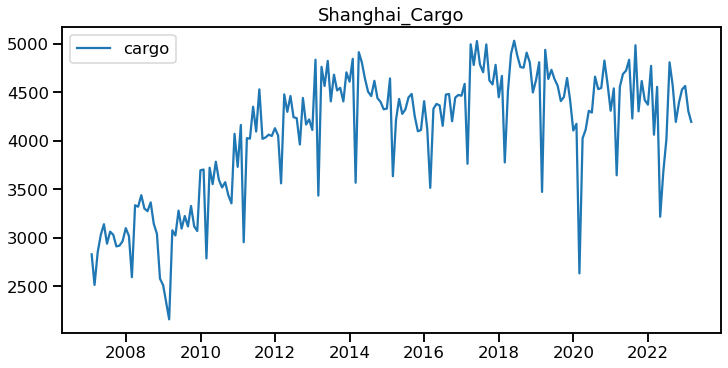

In [8]:
fig,ax = plt.subplots(figsize=(10,5), constrained_layout=True)
ax.plot(df.index, df['cargo'],label='cargo')
ax.legend()
ax.set_title('Shanghai_Cargo')

## Stationary
ADF test<br>
H0: Non stationary exists in the series<br>
H1: Stationary exists in the series

In [9]:
from statsmodels.tsa.stattools import adfuller
res = adfuller(df_train['cargo'])
print(f"Statistic: {res[0]}")
print(f"p-value: {res[1]}")
print(f"1%: ", res[4]["1%"] )
print(f"5%: ", res[4]["5%"])
print(f"10%: ",res[4]["10%"] )


Statistic: -1.9529888798092603
p-value: 0.30755832808019423
1%:  -3.473542528196209
5%:  -2.880497674144038
10%:  -2.576878053634677


In [10]:
res[4].values()

dict_values([-3.473542528196209, -2.880497674144038, -2.576878053634677])

## Seasonailty

### EDA: 월별 계절성을 확인

In [11]:
df_train.head()

,cargo
2007-01-31,2828.2
2007-02-28,2512.5
2007-03-31,2850.2
2007-04-30,3027.7
2007-05-31,3139.4


In [12]:
df_train.index.max()

Timestamp('2020-12-31 00:00:00')

In [13]:
df_train['month'] = df_train.index.month

#### box_plot

<AxesSubplot:ylabel='cargo'>

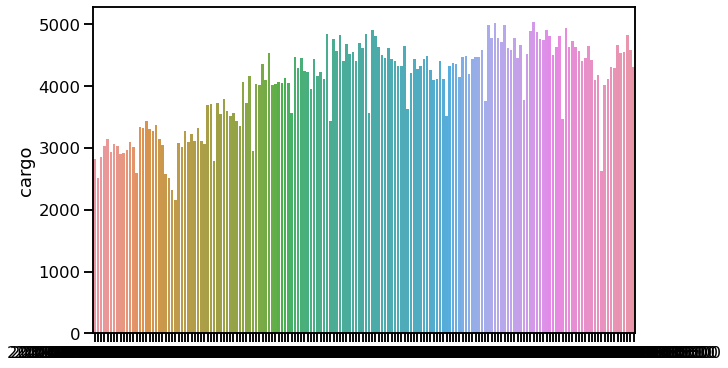

In [14]:
fig, ax = plt.subplots(figsize=(10,5),constrained_layout=True)
sns.barplot(data=df_train, x=df_train.index, y='cargo')

(2000.0, 5000.0)

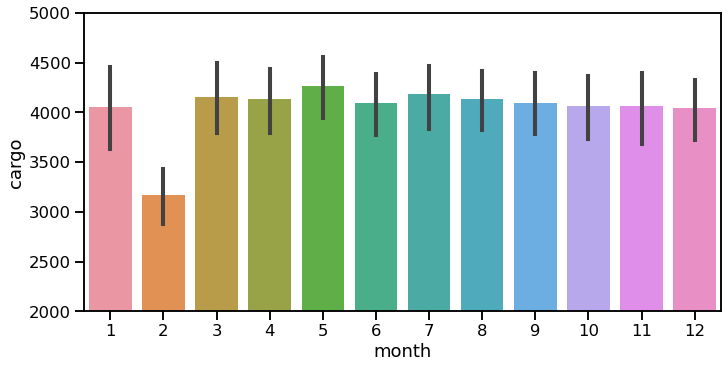

In [15]:
# 2월달에 하락 급격히 하락하는 모습을 보임
fig, ax = plt.subplots(figsize=(10,5),constrained_layout=True)
sns.barplot(data=df_train, x='month', y='cargo',ax=ax)
ax.set_ylim([2000,5000])

#### line plot

In [16]:
df_train.head()

,cargo,month
2007-01-31,2828.2,1
2007-02-28,2512.5,2
2007-03-31,2850.2,3
2007-04-30,3027.7,4
2007-05-31,3139.4,5


Text(0, 0.5, 'Cargo')

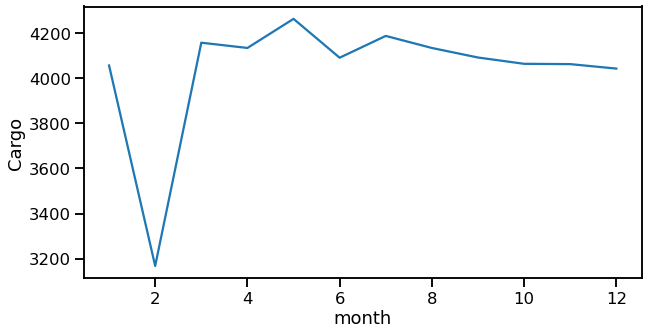

In [17]:
fig, ax = plt.subplots(figsize=(10, 5))
df_train.groupby("month")['cargo'].mean().plot(ax=ax)
plt.xlabel("month")
plt.ylabel("Cargo")

In [18]:
df_train['year'] = df_train.index.year
df_train.head()

,cargo,month,year
2007-01-31,2828.2,1,2007
2007-02-28,2512.5,2,2007
2007-03-31,2850.2,3,2007
2007-04-30,3027.7,4,2007
2007-05-31,3139.4,5,2007


In [19]:
df_train.pivot(index=["month"],columns=["year"])['cargo']

year,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
month,,,,,,,,,,,,,,
1,2828.2,3017.4,2324.2,3703.8,4163.2,4054.7,4836.4,4846.6,4643.6,4116.2,4587.9,4669.6,4810.7,4175.0
2,2512.5,2592.2,2157.0,2786.0,2953.2,3560.8,3434.3,3567.0,3634.4,3514.6,3763.0,3776.6,3472.1,2631.9
3,2850.2,3335.0,3076.2,3722.1,4027.6,4478.9,4763.2,4914.4,4219.1,4329.8,4995.9,4512.9,4938.6,4025.6
4,3027.7,3319.4,3022.6,3553.0,4021.9,4299.2,4565.7,4809.5,4432.0,4380.6,4782.6,4896.2,4637.8,4115.0
5,3139.4,3438.6,3279.3,3784.5,4351.8,4462.3,4824.5,4638.9,4277.8,4365.2,5029.5,5032.8,4732.4,4309.6
6,2938.4,3301.8,3093.6,3597.1,4095.5,4243.5,4406.7,4507.3,4322.6,4154.5,4787.2,4881.5,4637.3,4291.6
7,3062.2,3273.8,3223.6,3518.1,4530.9,4233.5,4682.6,4461.6,4447.1,4477.6,4707.4,4761.4,4567.8,4662.2
8,3029.0,3364.5,3115.8,3573.2,4020.5,3961.7,4519.9,4618.9,4484.0,4482.3,4994.7,4754.4,4409.9,4533.3
9,2909.9,3144.0,3327.5,3439.3,4034.4,4441.7,4546.4,4440.3,4254.0,4201.7,4624.2,4910.0,4452.3,4545.4


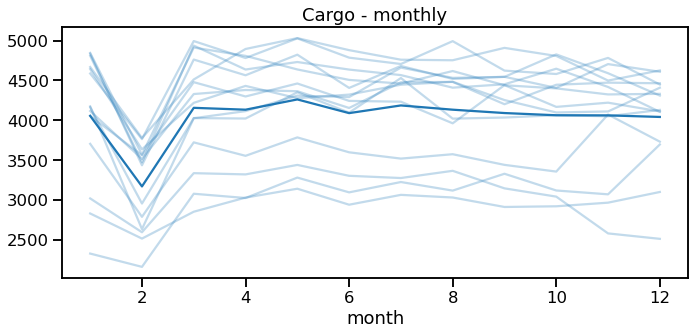

In [22]:
cmap = sns.color_palette("Blues", n_colors=5)

# 전체 데이터 월별 흐름 
fig, ax = plt.subplots(figsize=[10, 5])
(
    df_train.pivot(index=["month"], columns=["year"])['cargo'].plot(
        legend=False, alpha=0.3, color=cmap[3], ax=ax
    )
)

# 평균선
(df_train.groupby("month").mean(numeric_only=True)['cargo'].plot(ax=ax))

ax.set_title("Cargo - monthly")

plt.tight_layout()

### Detrend

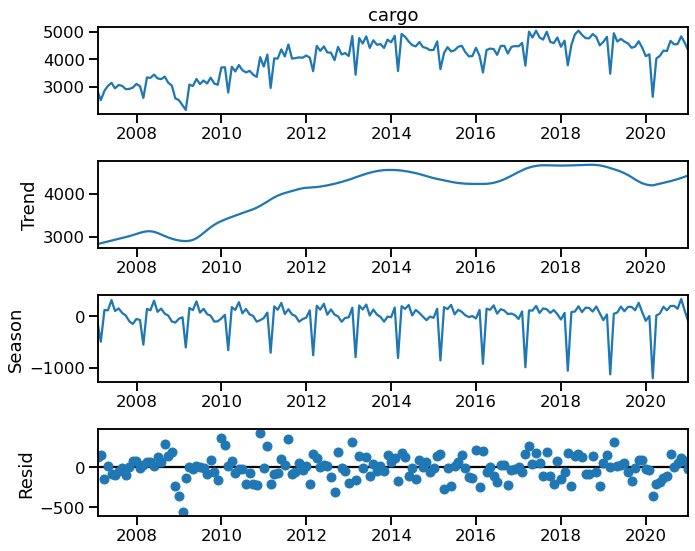

In [23]:
# Trend 가 존재하므로 Trend 제외 이후 분석
# STL 사용하여 추세제거
from statsmodels.tsa.seasonal import STL
stl = STL(df_train['cargo'],seasonal=13)
res = stl.fit()

plt.rc("figure", figsize=(10,8))
fig = res.plot()

### AutoCorrelation

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

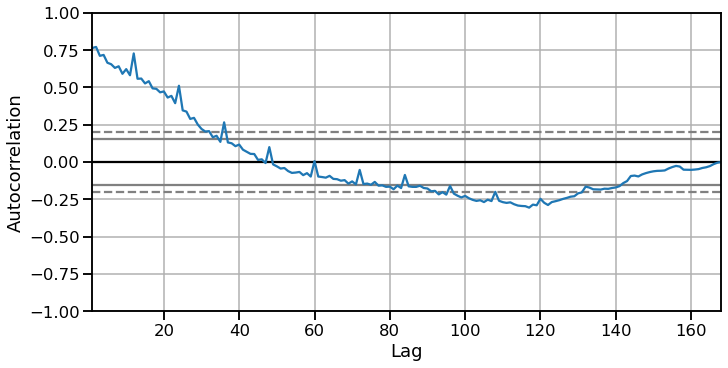

In [24]:
fig, ax = plt.subplots(figsize=(10,5), constrained_layout=True)
pd.plotting.autocorrelation_plot(df_train['cargo'])

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

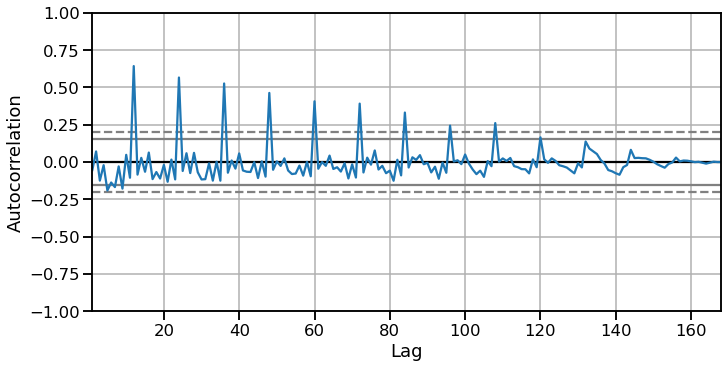

In [25]:
# detrend autocorrelation plot
fig, ax = plt.subplots(figsize=(10,5), constrained_layout=True)
detrend = res.seasonal + res.resid
pd.plotting.autocorrelation_plot(detrend)

(<matplotlib.patches.Rectangle at 0x21bff35ed60>,
 (<matplotlib.patches.ConnectionPatch at 0x21bff38b730>,
  <matplotlib.patches.ConnectionPatch at 0x21bff38bf70>))

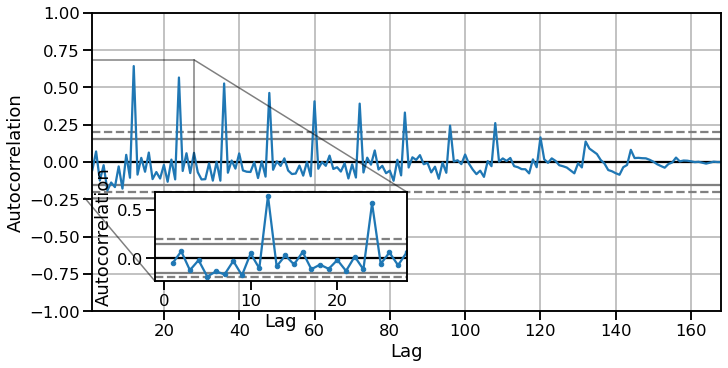

In [26]:
fig, ax = plt.subplots(figsize=(10,5), constrained_layout=True)
detrend = res.seasonal + res.resid
pd.plotting.autocorrelation_plot(detrend)
# 확대
ax_in = ax.inset_axes([0.1,0.1,0.4,0.3])
pd.plotting.autocorrelation_plot(detrend,ax=ax_in,marker='.')
ax_in.set_xlim(-1,28)
ax_in.grid(False)

# 확대부분
ax.indicate_inset_zoom(ax_in,edgecolor='k')

# Feature extraction
데이터가 많다면 df_train,df_valid,df_Train,df_test 에서 각각 feature extraction을 해줘야하지만<br>
데이터 수가 적은 관계로 df_Train, df_total 에서 추출

In [27]:
df_total = df[['cargo']].copy()
years = df.index.year

df_Train = df_total.loc[years<=2021].copy()

## Date feature

In [28]:
# month
df_total['month'] = df_total.index.month
df_Train['month'] = df_Train.index.month

## cyclical feature
월(1~12월)을 연속된 순환 feature로 변환 

In [29]:
df_total['month_sin'] = df_total['month'].apply(lambda x: np.sin(x/12 * 2*np.pi))
df_total['month_cos'] = df_total['month'].apply(lambda x: np.cos(x/12 * 2*np.pi))

df_Train['month_sin'] = df_Train['month'].apply(lambda x: np.sin(x/12* 2*np.pi))
df_Train['month_cos'] = df_Train['month'].apply(lambda x: np.cos(x/12* 2*np.pi))

# 기존 month 삭제
df_total.drop(columns='month',inplace=True)
df_Train.drop(columns='month',inplace=True)

## lag feature

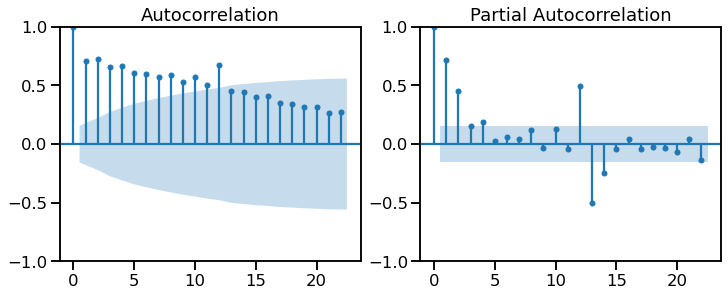

In [56]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig, axs = plt.subplots(ncols=2,figsize=(10,4),constrained_layout=True)
acf = plot_acf(df_train['cargo'],ax=axs[0])
pacf = plot_pacf(df_train['cargo'],ax=axs[1])

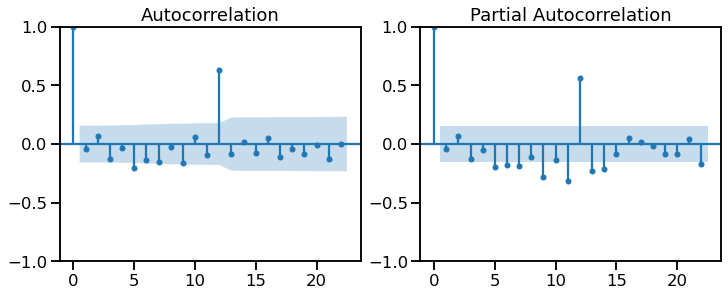

In [57]:
from statsmodels.tsa.seasonal import seasonal_decompose

# detrend
res = seasonal_decompose(df_train['cargo'],extrapolate_trend=True)

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig, axs = plt.subplots(ncols=2,figsize=(10,4),constrained_layout=True)
acf = plot_acf(res.seasonal+res.resid,ax=axs[0])
pacf = plot_pacf(res.seasonal+res.resid,ax=axs[1])

In [58]:
lags = [1,2,4,12]
for df in [df_Train,df_total]:
    for lag in lags:
        df[f"lag_{lag}"] = df['cargo'].shift(lag)
df_Train = df_Train.dropna()
df_total = df_total.dropna()

In [59]:
df_Train

,cargo,month_sin,month_cos,lag_1,lag_2,lag_4,lag_12
2009-01-31,2324.2,5.000000e-01,8.660254e-01,2509.3,2577.6,3144.0,3017.4
2009-02-28,2157.0,8.660254e-01,5.000000e-01,2324.2,2509.3,3040.0,2592.2
2009-03-31,3076.2,1.000000e+00,6.123234e-17,2157.0,2324.2,2577.6,3335.0
2009-04-30,3022.6,8.660254e-01,-5.000000e-01,3076.2,2157.0,2509.3,3319.4
2009-05-31,3279.3,5.000000e-01,-8.660254e-01,3022.6,3076.2,2324.2,3438.6
...,...,...,...,...,...,...,...
2021-08-31,4985.8,-8.660254e-01,-5.000000e-01,4230.3,4836.1,4688.2,4533.3
2021-09-30,4303.8,-1.000000e+00,-1.836970e-16,4985.8,4230.3,4724.7,4545.4
2021-10-31,4617.2,-8.660254e-01,5.000000e-01,4303.8,4985.8,4836.1,4828.0
2021-11-30,4420.3,-5.000000e-01,8.660254e-01,4617.2,4303.8,4230.3,4591.4


In [60]:
df_total

,cargo,month_sin,month_cos,lag_1,lag_2,lag_4,lag_12
2009-01-31,2324.2,5.000000e-01,8.660254e-01,2509.3,2577.6,3144.0,3017.4
2009-02-28,2157.0,8.660254e-01,5.000000e-01,2324.2,2509.3,3040.0,2592.2
2009-03-31,3076.2,1.000000e+00,6.123234e-17,2157.0,2324.2,2577.6,3335.0
2009-04-30,3022.6,8.660254e-01,-5.000000e-01,3076.2,2157.0,2509.3,3319.4
2009-05-31,3279.3,5.000000e-01,-8.660254e-01,3022.6,3076.2,2324.2,3438.6
...,...,...,...,...,...,...,...
2022-10-31,4394.4,-8.660254e-01,5.000000e-01,4194.7,4566.3,4017.0,4617.2
2022-11-30,4529.5,-5.000000e-01,8.660254e-01,4394.4,4194.7,4810.2,4420.3
2022-12-31,4566.1,-2.449294e-16,1.000000e+00,4529.5,4394.4,4566.3,4373.0
2023-01-31,4304.7,5.000000e-01,8.660254e-01,4566.1,4529.5,4194.7,4773.4


# Modeling1

## train valid test split

In [61]:
df_train = df_Train.loc[:'2020']
df_valid = df_Train.loc['2021']

X_train = df_train.drop(columns='cargo').copy()
y_train = df_train['cargo']

X_valid = df_valid.drop(columns='cargo').copy()
y_valid = df_valid['cargo']

In [62]:
X_train

,month_sin,month_cos,lag_1,lag_2,lag_4,lag_12
2009-01-31,5.000000e-01,8.660254e-01,2509.3,2577.6,3144.0,3017.4
2009-02-28,8.660254e-01,5.000000e-01,2324.2,2509.3,3040.0,2592.2
2009-03-31,1.000000e+00,6.123234e-17,2157.0,2324.2,2577.6,3335.0
2009-04-30,8.660254e-01,-5.000000e-01,3076.2,2157.0,2509.3,3319.4
2009-05-31,5.000000e-01,-8.660254e-01,3022.6,3076.2,2324.2,3438.6
...,...,...,...,...,...,...
2020-08-31,-8.660254e-01,-5.000000e-01,4662.2,4291.6,4115.0,4409.9
2020-09-30,-1.000000e+00,-1.836970e-16,4533.3,4662.2,4309.6,4452.3
2020-10-31,-8.660254e-01,5.000000e-01,4545.4,4533.3,4291.6,4648.1
2020-11-30,-5.000000e-01,8.660254e-01,4828.0,4545.4,4662.2,4418.5


## Lienar regression

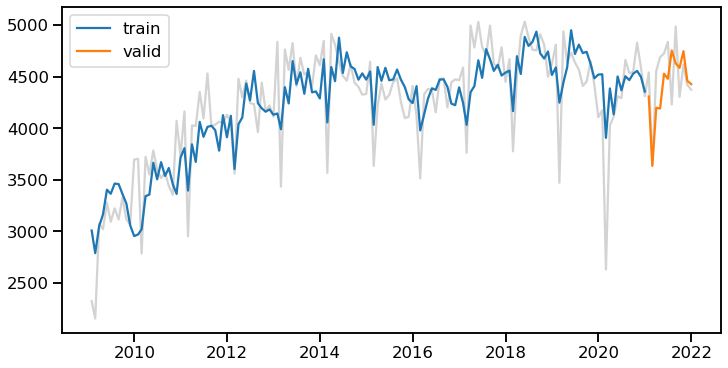

In [63]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

train_preds = model.predict(X_train)
valid_preds = model.predict(X_valid)

fig, ax = plt.subplots(figsize=(10,5),constrained_layout=True)
ax.plot(df_Train.index, df_Train['cargo'], c='lightgray')
ax.plot(df_train.index, train_preds, label='train')
ax.plot(df_valid.index, valid_preds, label='valid')
ax.legend()

## Random forest

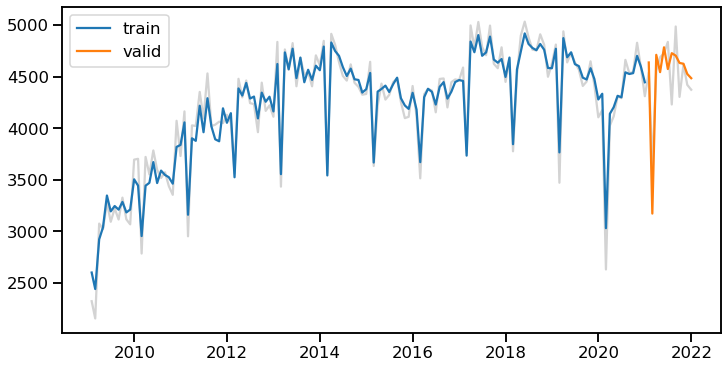

In [64]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train,y_train)

train_preds = model.predict(X_train)
valid_preds = model.predict(X_valid)

fig, ax = plt.subplots(figsize=(10,5),constrained_layout=True)
ax.plot(df_Train.index, df_Train['cargo'], c='lightgray')
ax.plot(df_train.index, train_preds, label='train')
ax.plot(df_valid.index, valid_preds, label='valid')
ax.legend()

# Trend Feature: trend 변화 고려

Text(0.5, 1.0, 'Shanghai_Cargo')

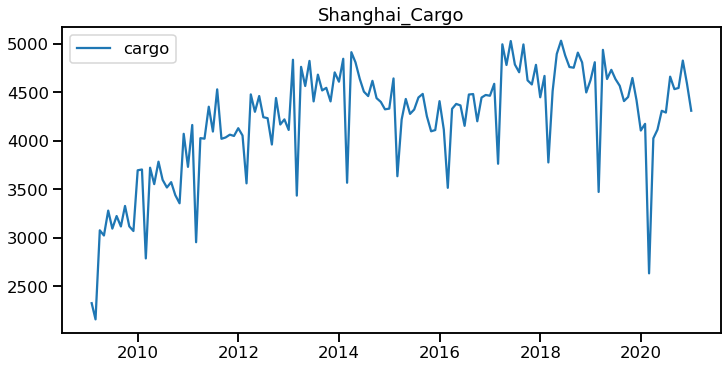

In [65]:
fig,ax = plt.subplots(figsize=(10,5), constrained_layout=True)
ax.plot(df_train.index, df_train['cargo'],label='cargo')
ax.legend()
ax.set_title('Shanghai_Cargo')

## Trend extraction

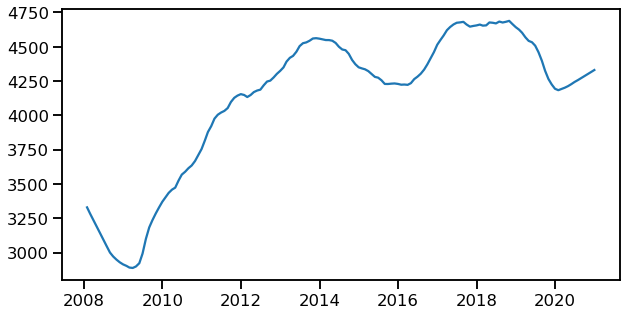

In [68]:
fig,ax = plt.subplots(figsize=(10,5))
ax.plot(res.trend.index, res.trend)

## Trial1: Lowess 
세세한 트랜드 스무딩을 위해 lowess 사용<br>
trend 를 뽑아 local min, local max 를 사용하여 trend가 변하는 날짜를 찾을 예정<br>
뽑힌 trend에서 local min, local max가 정확하게 뽑아질 수 있는지 여부가 중요<br>

In [69]:
# frac = 0.1
from statsmodels.nonparametric.smoothers_lowess import lowess
y = df_train['cargo']
x = np.arange(0,len(y))
frac = 0.1
res = lowess(
        endog=y,
        exog=x,
        frac = frac,
        it=3)
res[:10]

array([[0.00000000e+00, 2.70723117e+03],
       [1.00000000e+00, 2.79089065e+03],
       [2.00000000e+00, 2.87047118e+03],
       [3.00000000e+00, 2.94824875e+03],
       [4.00000000e+00, 3.02571954e+03],
       [5.00000000e+00, 3.10211638e+03],
       [6.00000000e+00, 3.16693144e+03],
       [7.00000000e+00, 3.21560978e+03],
       [8.00000000e+00, 3.27264406e+03],
       [9.00000000e+00, 3.33753323e+03]])

In [70]:
df_train['lowess'] = res[:,1]
df_train.head()

,cargo,month_sin,month_cos,lag_1,lag_2,lag_4,lag_12,lowess
2009-01-31,2324.2,0.500000,8.660254e-01,2509.3,2577.6,3144.0,3017.4,2707.231167
2009-02-28,2157.0,0.866025,5.000000e-01,2324.2,2509.3,3040.0,2592.2,2790.890646
2009-03-31,3076.2,1.000000,6.123234e-17,2157.0,2324.2,2577.6,3335.0,2870.471179
2009-04-30,3022.6,0.866025,-5.000000e-01,3076.2,2157.0,2509.3,3319.4,2948.248749
2009-05-31,3279.3,0.500000,-8.660254e-01,3022.6,3076.2,2324.2,3438.6,3025.719536


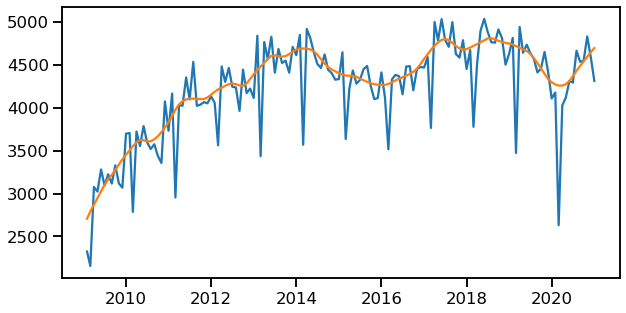

In [71]:
fig,ax = plt.subplots(figsize=(10,5))
ax.plot(df_train.index, df_train['cargo'], label='cargo')
ax.plot(df_train.index, df_train['lowess'],label='lowess_trend')

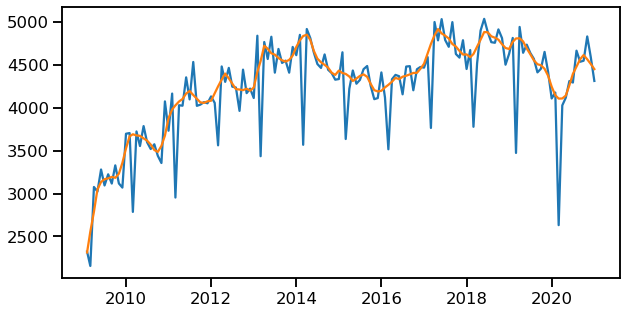

In [72]:
# frac 0.05 일때
frac = 0.05
res = lowess(
        endog=y,
        exog=x,
        frac = frac,
        it=3)
df_train['lowess'] = res[:,1]

fig,ax = plt.subplots(figsize=(10,5))
ax.plot(df_train.index, df_train['cargo'], label='cargo')
ax.plot(df_train.index, df_train['lowess'],label='lowess_trend')

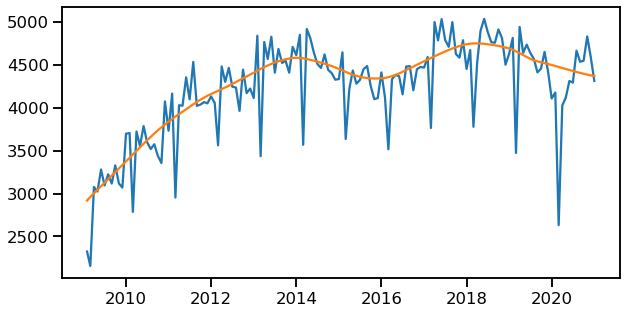

In [73]:
# frac 0.2 일때
frac = 0.25
res = lowess(
        endog=y,
        exog=x,
        frac = frac,
        it=3)
df_train['lowess'] = res[:,1]

fig,ax = plt.subplots(figsize=(10,5))
ax.plot(df_train.index, df_train['cargo'], label='cargo')
ax.plot(df_train.index, df_train['lowess'],label='lowess_trend')

In [74]:
from scipy.signal import argrelextrema
local_max_points = argrelextrema(np.array(df_train['lowess']), np.greater)[0]
print(f"local_max points: {local_max_points}")

local_min_points = argrelextrema(np.array(df_train['lowess']), np.less)[0]
print(f"local_min points: {local_min_points}")

local_max points: [ 59 110]
local_min points: [81]


In [75]:
change_points = np.concatenate([local_max_points,local_min_points])

Change points: 2013-12-31 00:00:00
Change points: 2018-03-31 00:00:00
Change points: 2015-10-31 00:00:00


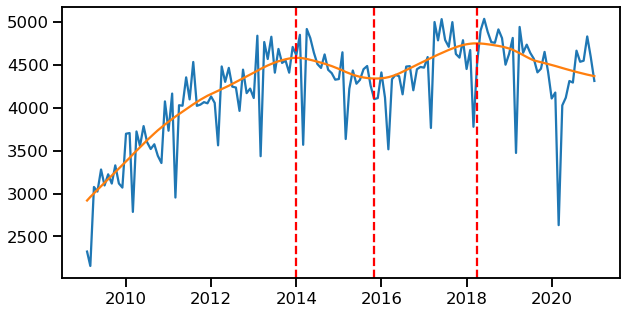

In [76]:
fig,ax = plt.subplots(figsize=(10,5))
ax.plot(df_train.index, df_train['cargo'], label='cargo')
ax.plot(df_train.index, df_train['lowess'],label='lowess_trend')
 
for points in change_points:
    ax.axvline(x= df_train.index[points], ls='--', color="r")
    c_date = df_train.index[points]
    print(f"Change points: {c_date}")

## Trial2: rolling
* 이동평균의 경우 이상치에 영향을 받아 조금 더 쉽게 change point를 찾을 수 있을 것이라 생각
* window 를 바꿔주면서 가장 잘 나타내는 점을 찾아보려함

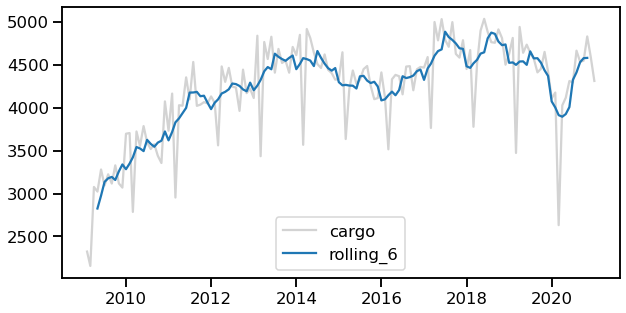

In [77]:
window = 6
df_rolling = df_train.rolling(window=window,center=True).mean()

fig,ax = plt.subplots(figsize=(10,5))

ax.plot(df_train.index, df_train['cargo'], label='cargo',color='lightgray')
ax.plot(df_rolling.index, df_rolling['cargo'], label=f'rolling_{window}')
ax.legend()

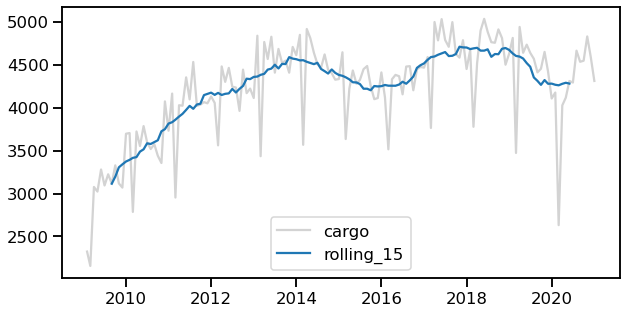

In [78]:
window = 15
df_rolling = df_train.rolling(window=window,center=True).mean()

fig,ax = plt.subplots(figsize=(10,5))

ax.plot(df_train.index, df_train['cargo'], label='cargo',color='lightgray')
ax.plot(df_rolling.index, df_rolling['cargo'], label=f'rolling_{window}')
ax.legend()

In [79]:
from scipy.signal import argrelextrema
local_max_points = argrelextrema(np.array(df_rolling['cargo']), np.greater)[0]
print(f"local_max points: {local_max_points}")

local_min_points = argrelextrema(np.array(df_rolling['cargo']), np.less)[0]
print(f"local_min points: {local_min_points}")

local_max points: [ 17  29  35  37  41  45  53  55  57  61  65  69  81  84  89 101 105 110
 113 115 118 129 131 135]
local_min points: [ 18  30  36  38  42  46  54  56  60  64  68  80  82  87  90 102 108 111
 114 116 128 130 133]


<AxesSubplot:>

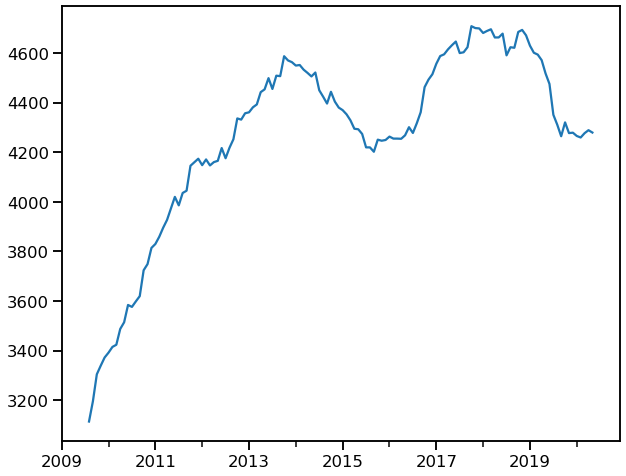

In [80]:
df_rolling['cargo'].plot()

<AxesSubplot:>

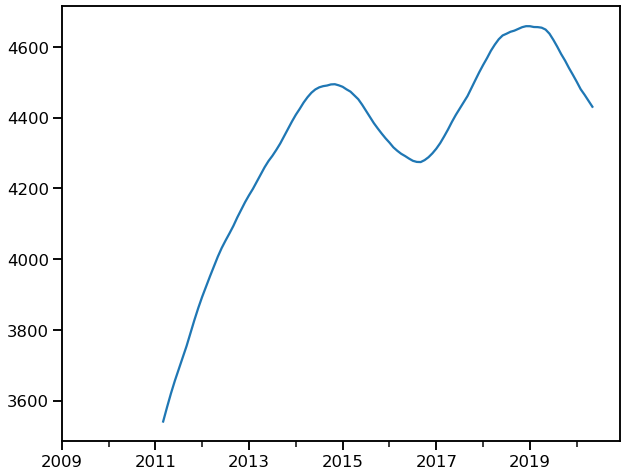

In [81]:
# re-smoothing
df_rolling2 = df_rolling['cargo'].rolling(window=20).mean()
df_rolling2.plot()

In [82]:
local_max_points = argrelextrema(np.array(df_rolling2), np.greater)[0]
print(f"local_max points: {local_max_points}")

local_min_points = argrelextrema(np.array(df_rolling2), np.less)[0]
print(f"local_min points: {local_min_points}")

local_max points: [ 70 119]
local_min points: [92]


Change points: 2014-11-30 00:00:00
Change points: 2018-12-31 00:00:00
Change points: 2016-09-30 00:00:00


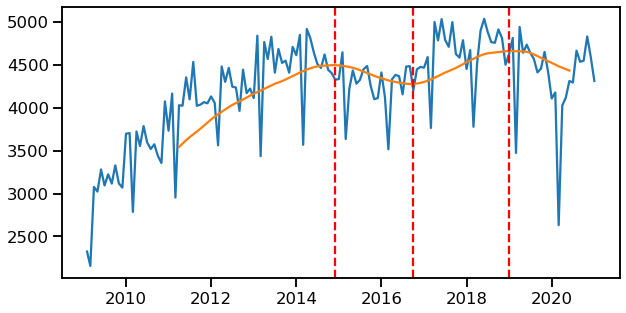

In [83]:
change_points = np.concatenate([local_max_points,local_min_points])
fig,ax = plt.subplots(figsize=(10,5))
ax.plot(df_train.index, df_train['cargo'], label='cargo')
ax.plot(df_rolling2.index, df_rolling2,label='lowess_trend')
 
for points in change_points:
    ax.axvline(x= df_train.index[points], ls='--', color="r")
    c_date = df_train.index[points]
    print(f"Change points: {c_date}")

In [84]:
# 마지막 추세변환점 직접 찾기
# 2020년 2월 급격한 감소
df_train.loc['2020']['cargo']

2020-01-31    4175.0
2020-02-29    2631.9
2020-03-31    4025.6
2020-04-30    4115.0
2020-05-31    4309.6
2020-06-30    4291.6
2020-07-31    4662.2
2020-08-31    4533.3
2020-09-30    4545.4
2020-10-31    4828.0
2020-11-30    4591.4
2020-12-31    4310.3
Name: cargo, dtype: float64

## Change point detection 시도결과
* trend의 증가 감소는 잡을 수 있지만 같은 추세에서 기울기 변화는 잡을 수 없는 한계가 있음
* lowess의 경우 이상치에 robust 한 성질이 있어 추세변화점을 잡기에 좋지 않았음
* local min, local max가 잘 나오게 조절하려면 frac을 사람이 조절해줘야 하는 문제점이 있음

* rolling의 경우 변화가 크게 있어 포인트 잡기는 좋았음
* 하지만 밀리는 점, 가장 중요한 끝부분에서 잡히지 않는 점 등에서 문제
자동화 모델을 구축하기엔 한계가 있음-> 추후 논문을 보고 구현해볼 계획

 # Modeling2(+trend feature)
 train 데이터의 추세와 valid 데이터의 추세가 달라 원하는 예측성능이 나오지 않음

In [85]:
change_dates = []
for points in change_points:
    c_date = df_Train.index[points]
    change_dates.append(c_date)
    
# 시작점
change_dates.append(df_Train.index[0])
change_dates.append(pd.to_datetime('2020-02-29'))
change_dates

[Timestamp('2014-11-30 00:00:00'),
 Timestamp('2018-12-31 00:00:00'),
 Timestamp('2016-09-30 00:00:00'),
 Timestamp('2009-01-31 00:00:00'),
 Timestamp('2020-02-29 00:00:00')]

In [86]:
for date in change_dates:
    time_diff = df_Train.index - date
    df_Train[f'time_since_{date}'] = np.round(time_diff/np.timedelta64(1,"M"))
    df_Train[f'time_since_{date}'] = df_Train[f'time_since_{date}'].clip(0)

In [87]:
df_Train

,cargo,month_sin,month_cos,lag_1,lag_2,lag_4,lag_12,time_since_2014-11-30 00:00:00,time_since_2018-12-31 00:00:00,time_since_2016-09-30 00:00:00,time_since_2009-01-31 00:00:00,time_since_2020-02-29 00:00:00
2009-01-31,2324.2,5.000000e-01,8.660254e-01,2509.3,2577.6,3144.0,3017.4,0.0,0.0,0.0,0.0,0.0
2009-02-28,2157.0,8.660254e-01,5.000000e-01,2324.2,2509.3,3040.0,2592.2,0.0,0.0,0.0,1.0,0.0
2009-03-31,3076.2,1.000000e+00,6.123234e-17,2157.0,2324.2,2577.6,3335.0,0.0,0.0,0.0,2.0,0.0
2009-04-30,3022.6,8.660254e-01,-5.000000e-01,3076.2,2157.0,2509.3,3319.4,0.0,0.0,0.0,3.0,0.0
2009-05-31,3279.3,5.000000e-01,-8.660254e-01,3022.6,3076.2,2324.2,3438.6,0.0,0.0,0.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-31,4985.8,-8.660254e-01,-5.000000e-01,4230.3,4836.1,4688.2,4533.3,81.0,32.0,59.0,151.0,18.0
2021-09-30,4303.8,-1.000000e+00,-1.836970e-16,4985.8,4230.3,4724.7,4545.4,82.0,33.0,60.0,152.0,19.0
2021-10-31,4617.2,-8.660254e-01,5.000000e-01,4303.8,4985.8,4836.1,4828.0,83.0,34.0,61.0,153.0,20.0
2021-11-30,4420.3,-5.000000e-01,8.660254e-01,4617.2,4303.8,4230.3,4591.4,84.0,35.0,62.0,154.0,21.0


In [88]:
df_train = df_Train.loc[:'2020']
df_valid = df_Train.loc['2021']

X_train = df_train.drop(columns='cargo').copy()
y_train = df_train['cargo']

X_valid = df_valid.drop(columns='cargo').copy()
y_valid = df_valid['cargo']

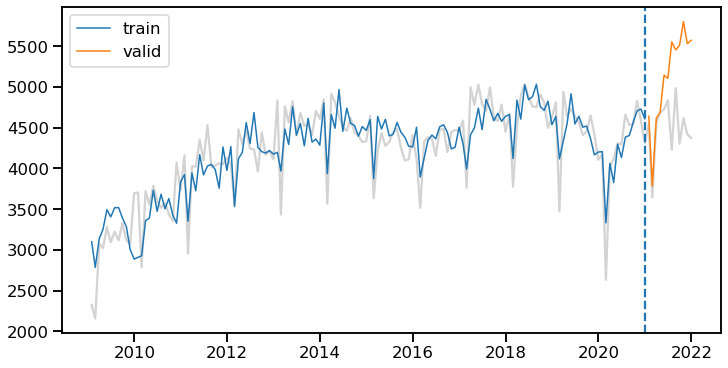

In [90]:
model = LinearRegression()
model.fit(X_train,y_train)

train_preds = model.predict(X_train)
valid_preds = model.predict(X_valid)

fig, ax = plt.subplots(figsize=(10,5),constrained_layout=True)
ax.plot(df_Train.index, df_Train['cargo'], c='lightgray')
ax.plot(df_train.index, train_preds, lw=1.5, label='train')
ax.plot(df_valid.index, valid_preds, lw=1.5, label='valid')

# train, valid 구분선
ax.axvline(x=pd.to_datetime("2020-12-31"), ls='--')
ax.legend()